## **Import Project Requirements and Dependencies** 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

# For Heatmap of correlational matrix
import seaborn 

# Decomposition Requirements
from statsmodels.tsa.seasonal import seasonal_decompose

## **Dataset Analysis**

There are six columns given:

High -> Highest Price of the stock for that particular date.

Low -> Lowest Price of the stock for that particular date.

Open -> Opening Price of the stock.

Close -> Closing Price of the stock.

Volume -> Total amount of Trading Activity.

AdjClose -> Adjusted values factor in corporate actions such as dividends, stock splits, and new share issuance.

In [ ]:
# I have manually copied the dataset in the same directory of colab notebook for simpler usage
df = pd.read_csv('yahoo_stock.csv')
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
...,...,...,...,...,...,...,...
1820,2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912
1821,2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029
1822,2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039
1823,2020-11-19,3585.219971,3543.840088,3559.409912,3581.870117,4.347200e+09,3581.870117


In [ ]:
# Check the size of dataset
df.shape

(1825, 7)

In [ ]:
# Get a quick analysis by pandas describe method to understand the unique values and learn about any missing data 
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03,1825.000000
mean,2660.718673,2632.817580,2647.704751,2647.856284,3.869627e+09,2647.856284
std,409.680853,404.310068,407.169994,407.301177,1.087593e+09,407.301177
min,1847.000000,1810.099976,1833.400024,1829.079956,1.296540e+09,1829.079956
25%,2348.350098,2322.250000,2341.979980,2328.949951,3.257950e+09,2328.949951
50%,2696.250000,2667.840088,2685.489990,2683.340088,3.609740e+09,2683.340088
75%,2930.790039,2900.709961,2913.860107,2917.520020,4.142850e+09,2917.520020
max,3645.989990,3600.159912,3612.090088,3626.909912,9.044690e+09,3626.909912


In [ ]:
# Get a quick information about the dataset using pandas library function 'info'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1825 non-null   object 
 1   High       1825 non-null   float64
 2   Low        1825 non-null   float64
 3   Open       1825 non-null   float64
 4   Close      1825 non-null   float64
 5   Volume     1825 non-null   float64
 6   Adj Close  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 99.9+ KB


The above statistics tell us there are no missing entries in the dataset. The row count from df.shape and the count from each column match so we are done in checking missing values and there are no such anomaly. However Date is in 'object' format. I will see and make an index based on Date if necessary as I proceed with this dataset since date in 'object' format is not easy to play around with.

In [ ]:
# Check number of unique entries for each date
df['Date'].nunique()

1825

That's really a good result. Every date contains some unique data in the given dataset

In [ ]:
# Let me change the 'object' formatted date to a datetime for easier operations in future.
# I will make 'Date' the index of this dataframe that I can easily play around with the dataset with any date.

df = pd.read_csv('yahoo_stock.csv', parse_dates = ['Date'], index_col = 'Date')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [ ]:
# I can now play around with the dates and let me assert the timespan of this dataset = 1825
print("Earliest Date => "+ str(df.index.min().date()) )
print("Latest Date => " + str(df.index.max().date()) )
print("Timespan for => " +  str( 1 + (df.index.max().date() - df.index.min().date() ).days ))

Earliest Date => 2015-11-23
Latest Date => 2020-11-20
Timespan for => 1825


So the dataset has data for a timespan of 1825 days.
The Stock Price for 1825 days are given in this dataset, starting from 23rd November 2015 to 20th November 2020.


Let us compare the 'High', 'Low' values for each day for the dataset by plotting them together

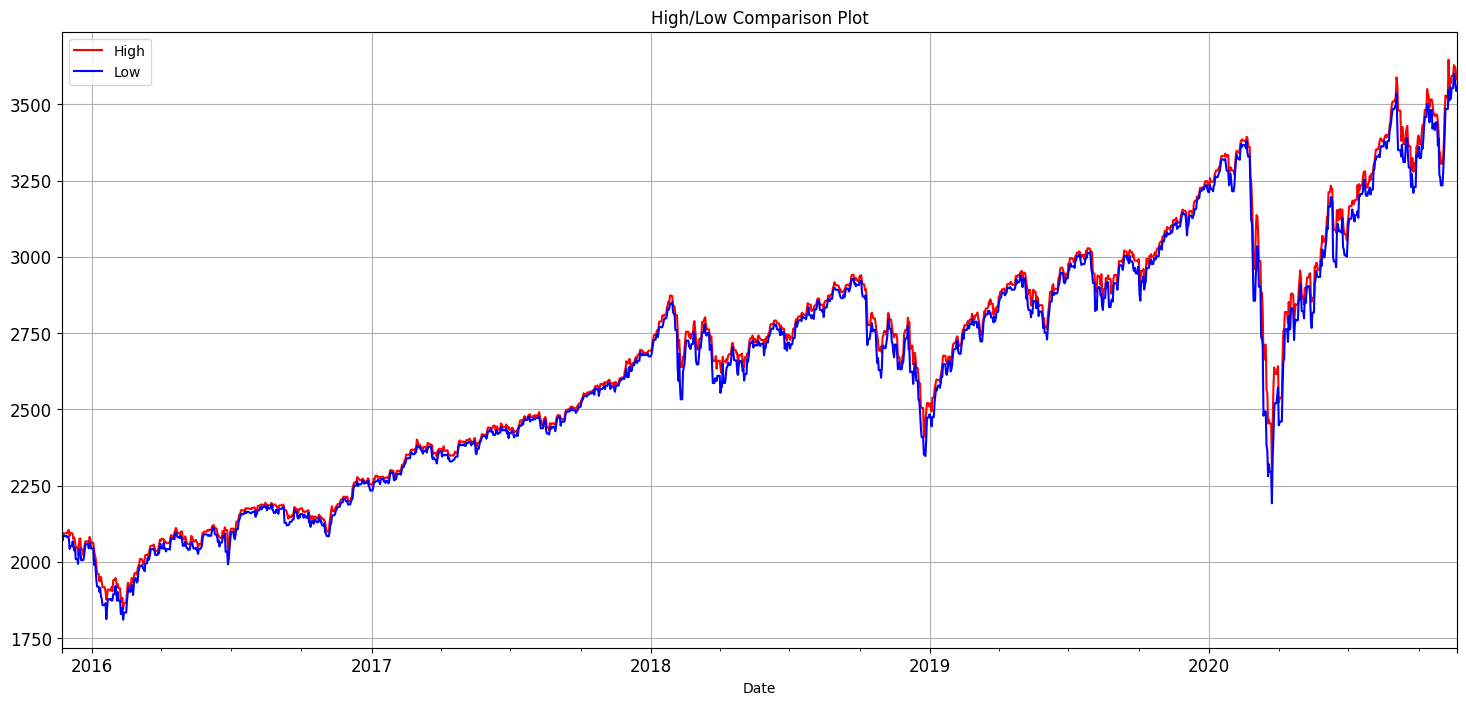

In [ ]:
plt.style.use('default')
df[['High','Low']].plot(figsize = (18, 8), alpha = 1, color = ['red','blue'], grid = True, fontsize = 12, title = "High/Low Comparison Plot")

Let us compare the 'Open', 'Close' values for each day for the dataset by plotting them together

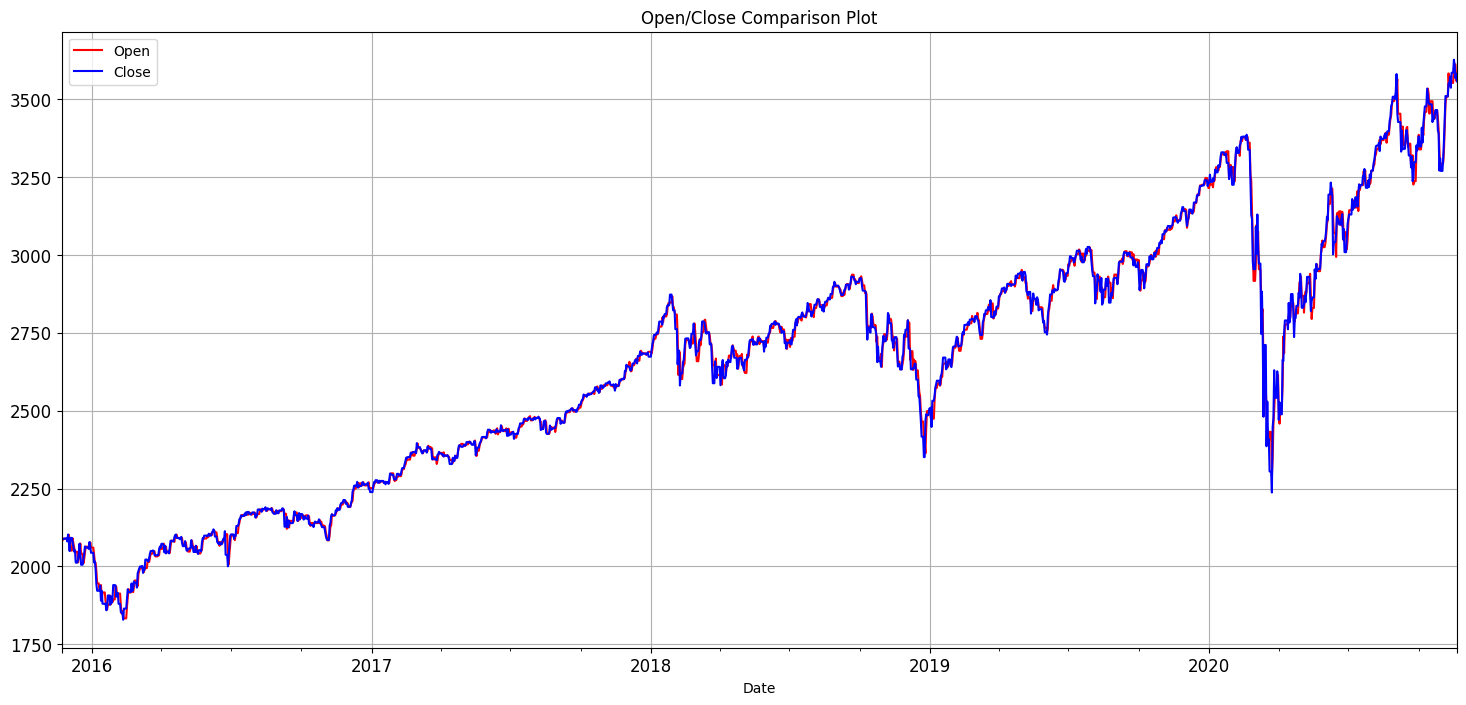

In [ ]:
plt.style.use('default')
df[['Open','Close']].plot(figsize = (18, 8), alpha = 1, color = ['red','blue'], grid = True, fontsize = 12, title = "Open/Close Comparison Plot")

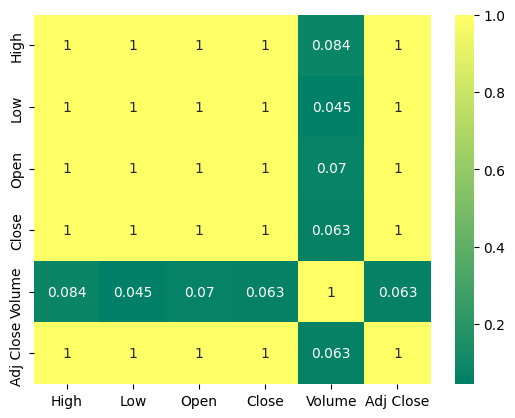

In [ ]:
corr_matrix = df.corr()
seaborn.heatmap(corr_matrix, cmap='summer', annot=True)

The four had almost same behaviour troughout time and based on this assumption in this project we will only focus on one of them 'Close' in order to build a model which could predict future values.
Firstly, we will demonstrate if the time-series problem corresponds to a Non-Stationary type, which characterizes for having:

- Non-constant variance.
- Non-constant mean.
- Seasonality.
- High autocorrelation.

There are four well known ways to evaluate if the series meets the criteria just mentioned, these corresponds to:

- Sequence visualization.
- Histogram, Autocorrelation and Partial Aurocorrelation plots.
- Statistical summary of chunks.
- Adfuller test.



### **Evaluating Stationarity**

When we draw a histogram plot, if it shows uniform distribution, it implies that there exist a non-constant mean or "trend"

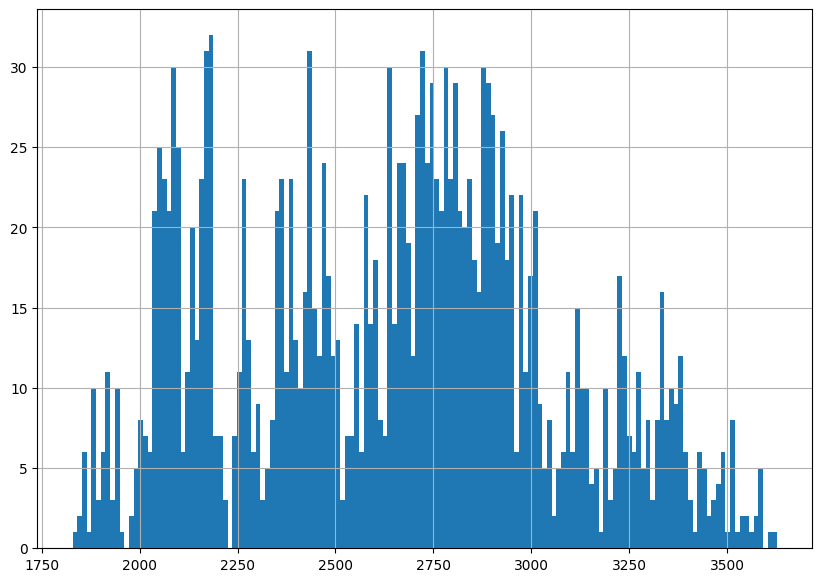

In [ ]:
df.Close.hist(bins=150, figsize = (10,7))

We can neither say that this is uniform or non-uniform(for eg., normal). A better view can be given by statistical summary, for which we divide in chunks of 20 and calculate mean and standard deviation(which would account for variance) of each particular chunk.

In [ ]:
chunks = int(df.shape[0]/20)
chunks

91

In [ ]:
from statistics import stdev
mean = []
std = []
    
for i in range(0,10):
    mean.append(df['Close'].iloc[(i*chunks):(i*chunks)+chunks].mean())
    std.append(stdev(df['Close'].iloc[(i*chunks):(i*chunks)+chunks]))

pd.concat([pd.DataFrame(mean,columns=['Mean']),pd.DataFrame(std,columns=['Standard Deviation'])], axis=1)

,Mean,Standard Deviation
0,1974.840445,84.474742
1,2041.199448,42.450321
2,2127.344622,46.909925
3,2151.854157,24.616697
4,2265.704284,38.865620
5,2368.971857,19.137929
6,2442.879352,22.336112
7,2527.672441,49.199058
8,2706.569787,77.578755
9,2686.376916,51.354722


Above we see how both measures are clearly different in each chunk. However looking at the plot we could assume a constant variance as the ripple in the curve, but without a doubt trend is the most outstanding feature. Until now can assume it's a non-stationary series, but to know more about it we will evaluate two other methods.
Seasonal decomposition is a function from statsmodels library which allows us to decompose the serie into trend, seasonal and residual, either additive or multiplicative:

### **Decomposing Time Series Data into Trend and Seasonality**



A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

All series have a level and noise. The trend and seasonality components are optional. It is helpful to think of the components as combining either additively or multiplicatively.

An additive model suggests that the components are added together as follows:

    y(t) = Level + Trend + Seasonality + Noise

An additive model is linear where changes over time are consistently made by the same amount. A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).

A multiplicative model suggests that the components are multiplied together as follows:

    y(t) = Level Trend Seasonality * Noise

A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time. A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.

Decomposition provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model.

Each of these components are something you may need to think about and address during data preparation, model selection, and model tuning. You may address it explicitly in terms of modeling the trend and subtracting it from your data, or implicitly by providing enough history for an algorithm to model a trend if it may exist.

In order to implement the naive or classical decomposition method, we use the seasonal_decompose() method provided by the statsmodels library. It requires to specify whether the model is Additive or Multiplicative.


In [ ]:
def decompose(df, column_name):
    """
    A function that returns the trend, seasonality and residual captured by applying both multiplicative and
    additive model.
    df -> DataFrame
    column_name -> column_name for which trend, seasonality is to be captured
    """
    result_mul = seasonal_decompose(df[column_name], model='multiplicative', extrapolate_trend = 'freq')
    result_add = seasonal_decompose(df[column_name], model = 'additive', extrapolate_trend='freq')

    plt.rcParams.update({'figure.figsize': (20, 10)})
    result_mul.plot().suptitle('Multiplicative Decompose', fontsize=30)
    result_add.plot().suptitle('Additive Decompose', fontsize=30)
    plt.show()
    
    return result_mul, result_add

The seasonal_decompose() function returns a result object. The result object contains arrays to access four pieces of data from the decomposition: Observed Series, Trend, Seasonality, and residual. We have plotted both Multiplicative as well as Additive model, so that we can decide which one of the two should be used.


### **Decompose data of Closing prices**

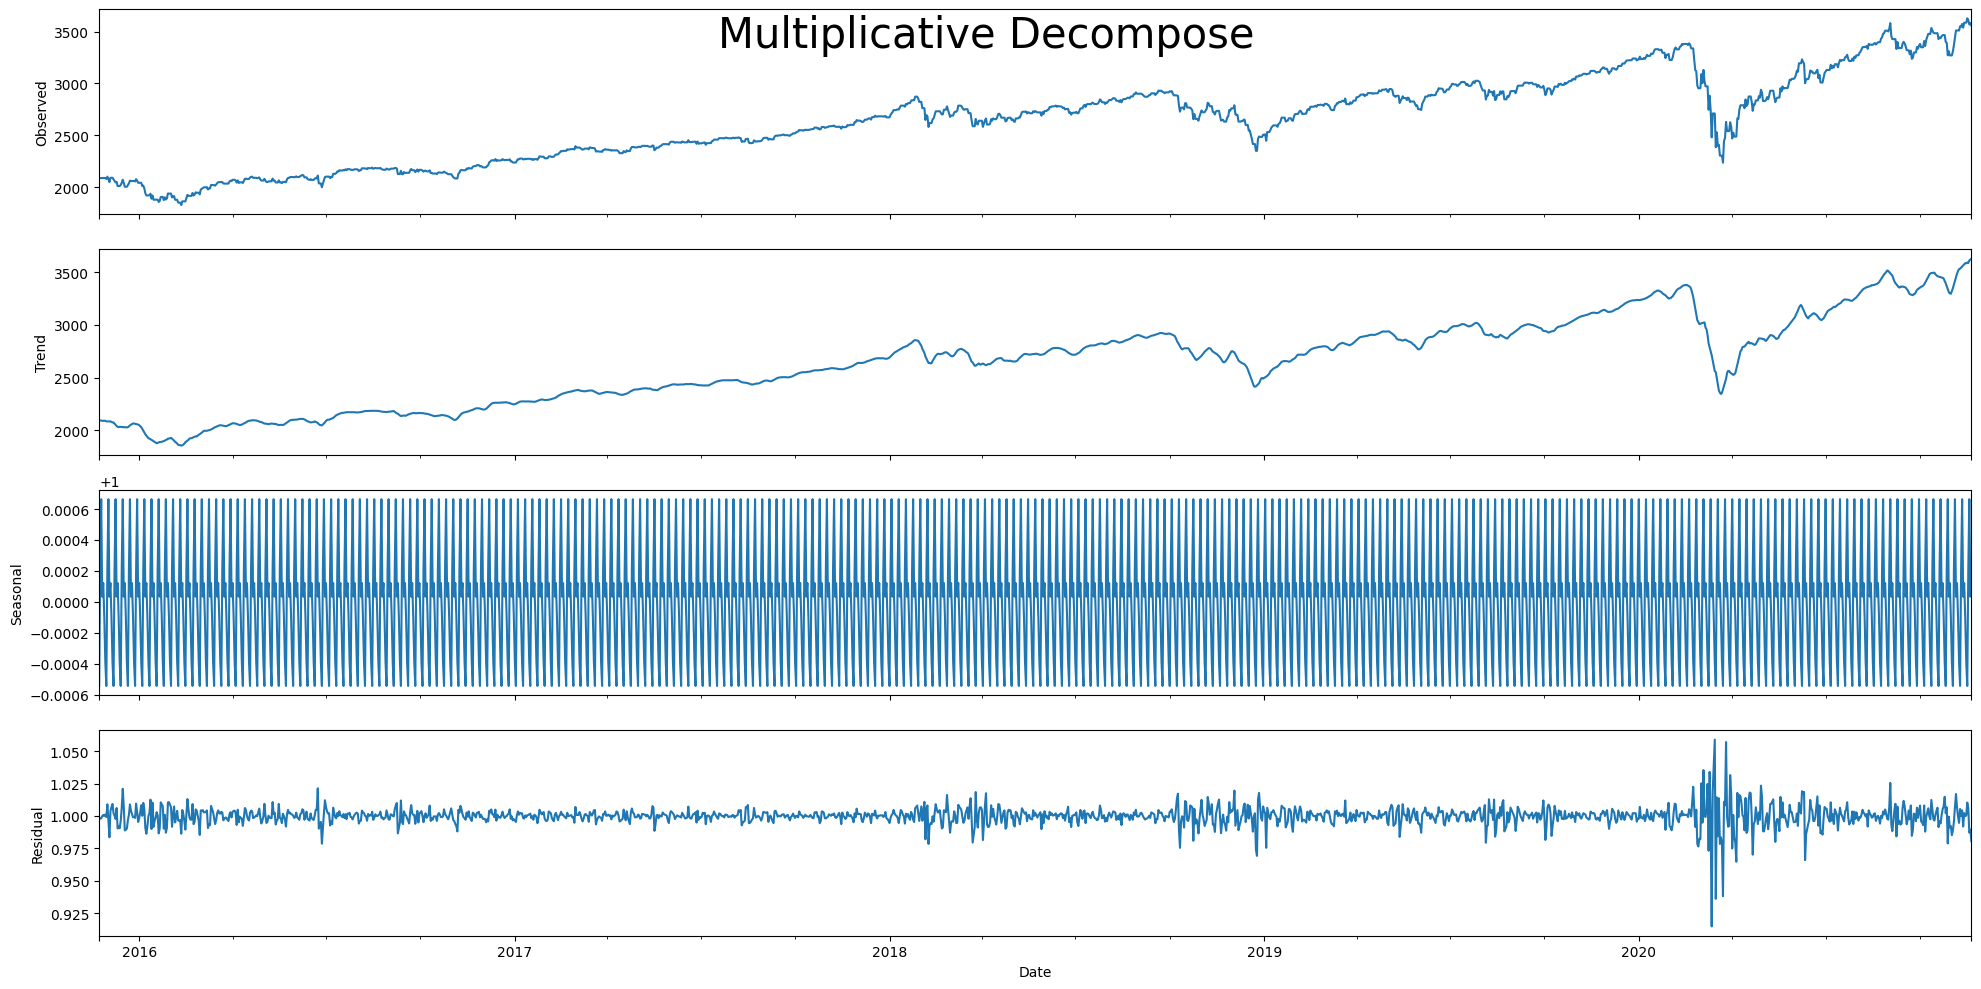

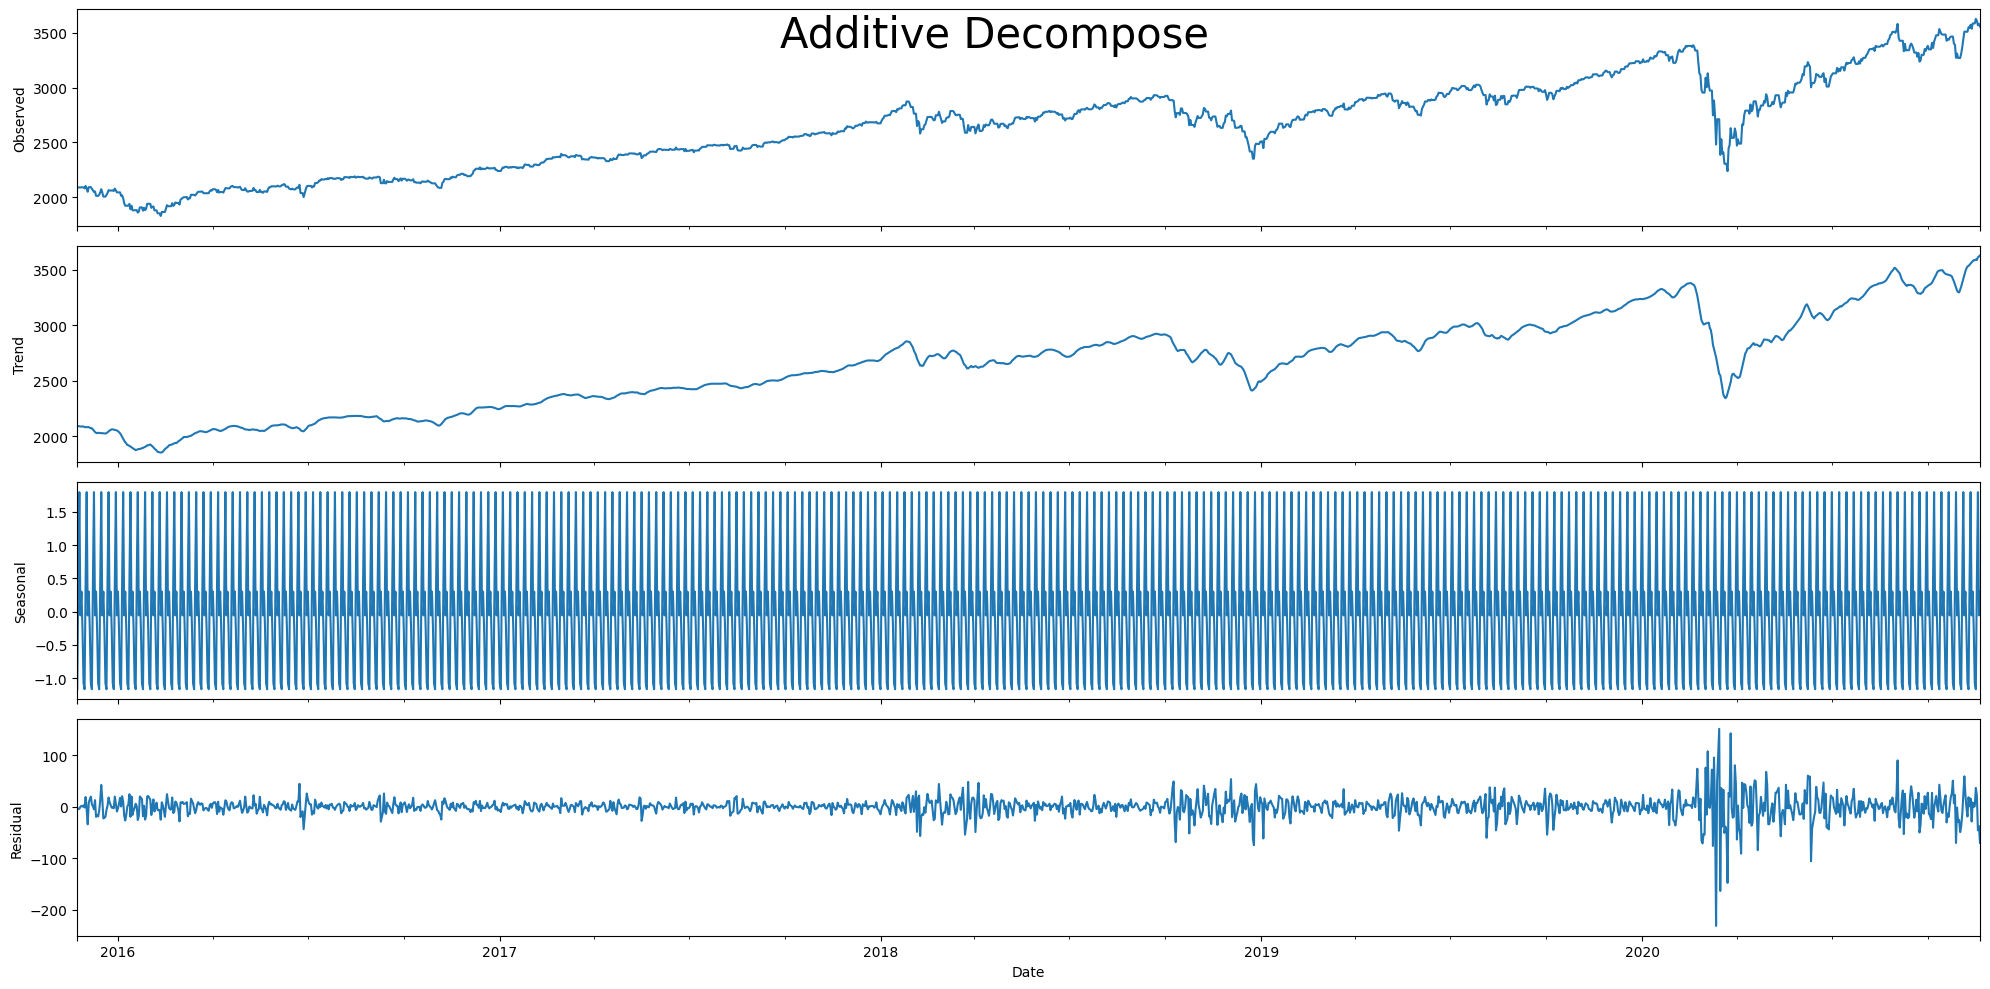

In [ ]:
result_mul, result_add = decompose(df, 'Close')

In [ ]:
df_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis = 1)
df_reconstructed.columns = ['Seasonal', 'Trend', 'Residual', 'Actual_Values']
df_reconstructed

,Seasonal,Trend,Residual,Actual_Values
Date,,,,
2015-11-23,-1.164921,2093.707970,-5.952962,2086.590088
2015-11-24,0.458303,2092.533927,-3.852337,2089.139893
2015-11-25,1.797703,2091.359883,-4.287469,2088.870117
2015-11-26,-0.055060,2089.114362,-0.189185,2088.870117
2015-11-27,0.301771,2088.231480,1.576856,2090.110107
...,...,...,...,...
2020-11-16,-1.164921,3591.649972,36.424861,3626.909912
2020-11-17,0.458303,3587.705706,21.366021,3609.530029
2020-11-18,1.797703,3611.870212,-45.877876,3567.790039


The residuals plotted should not be following any kind of pattern, it should be spread randomly.

We can see that the trend and seasonality information extracted from the series does seem reasonable. The residuals are also interesting, showing periods of high variability during the rapid falls and rise in the series.

The trend can be clearly observed in the plots above. We had also said that decomposing using additive model will represent the series as a sum of seasonality, trend and residual. Let's check that out:




Indeed, the sum of the columns seas, trend and resid is equal to the actual values.

Let's try it out for other columns too.


### **AutoCorrelation**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

Plot Complete


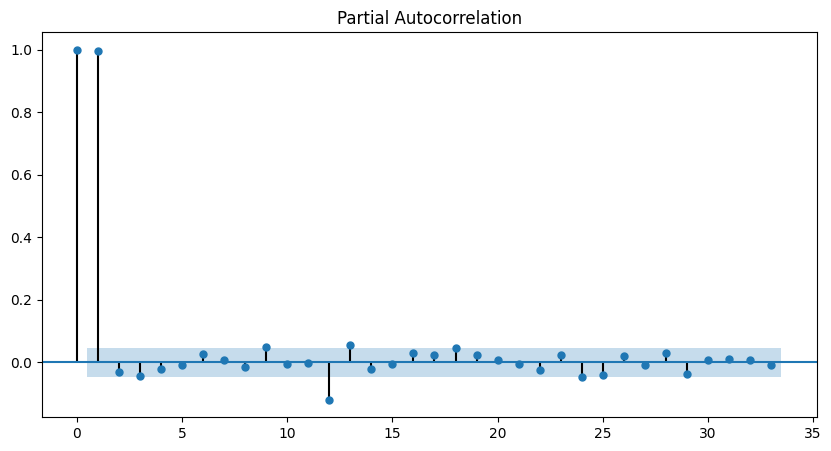

In [ ]:
plt.rc("figure", figsize=(10,5))
plot_pacf(df['High'])
print("Plot Complete")

Plot Complete


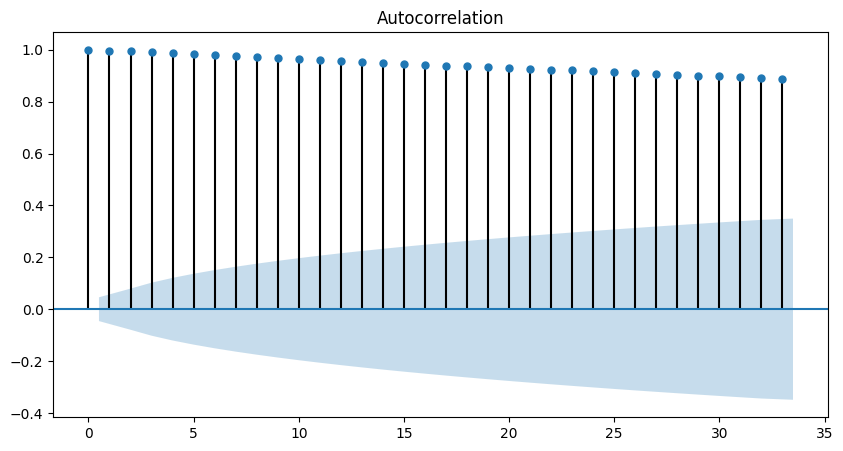

In [ ]:
plt.rc("figure", figsize=(10,5))
plot_acf(df['High'])
print("Plot Complete")

### **Dicky-Fueller Test**

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result = adfuller(df['High'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.713598
p-value: 0.843196
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


As p-value is greater than 0.05 we fail to reject the null hipothesis, therefore there is not enough evidence that we are working with a stationary series. Let's apply the log transformation to the serie and test again.

In [ ]:
from numpy import log

result = adfuller(log(df['High']))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.920468
p-value: 0.781157
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


## **Training and testing the Model**

An RNN(LSTM) will be used for the model

In [ ]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
data = df

In [ ]:
# Check what percentage is good Test Split
data.loc["2020-06":].shape[0] / data.shape[0]


0.09479452054794521

### **Splitting the dataset for training and testing**
Appx 95%-5% split for train-test (Pandemic to be accounted for) otherwise it might mess up

In [ ]:
split_at = "2020-06"

scaler = MinMaxScaler(feature_range=(0,1))
train_data = data.loc[:split_at]
print(train_data.shape)
scaled_data = scaler.fit_transform(train_data['Close'].values.reshape(-1,1))
scaled_data

(1682, 6)


array([[0.16538122],
       [0.16701879],
       [0.16684553],
       ...,
       [0.75781444],
       [0.78619463],
       [0.81641168]])

In [ ]:
# how many days do i want to base my predictions on ?
prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x - prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


### **Implementing the Model**

In [ ]:
def LSTM_model():
    
    model = Sequential()
    
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    
    model.add(Dense(units=1))
    
    return model

### **Training the model**

epochs = 100,
loss_fn = mse,
optimizer = adam

In [ ]:
import keras

model = LSTM_model()
model.summary()
model.compile(optimizer="adam", 
              loss='mse')

# Define callbacks

callbacks = [keras.callbacks.EarlyStopping(monitor='loss',
                                           patience=10,
                                           verbose=1)]
model.fit(x_train, 
          y_train, 
          epochs=100, batch_size=16,
          verbose=2,validation_split=0.05,
          callbacks = callbacks)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5

### **Predictions on Test Set** 

In [ ]:
test_data = df.loc[split_at:]

actual_prices = test_data['Close'].values

rem_data = df.loc[:split_at]

total_dataset = pd.concat((rem_data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [ ]:
x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] ,1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

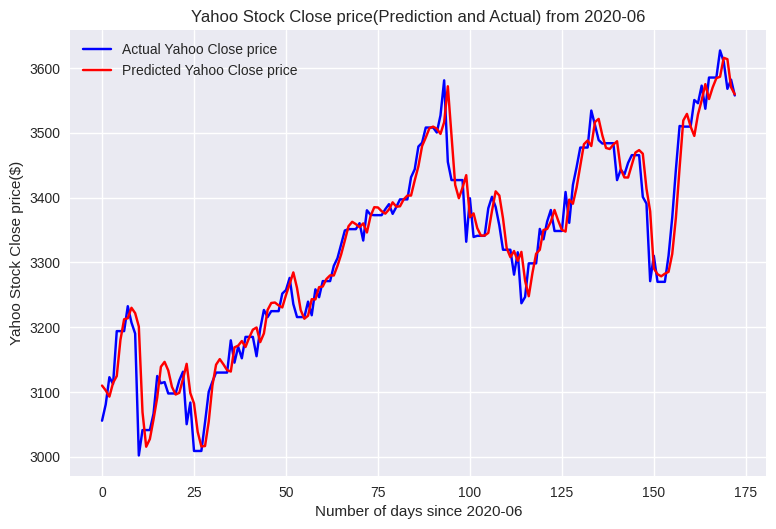

In [ ]:
company = "Yahoo"
plt.style.use("seaborn")
plt.plot(actual_prices, color='blue', label=f"Actual {company} Close price")
plt.plot(predicted_prices, color= 'red', label=f"Predicted {company} Close price")
plt.title(f"{company} Stock Close price(Prediction and Actual) from {split_at}")
plt.xlabel(f"Number of days since {split_at}")
plt.ylabel(f"{company} Stock Close price($)")
plt.legend()
plt.show()

In [ ]:
# Prediction for the next day after this dataset ends
real_data = [model_inputs[len(model_inputs)+1 - prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

In [ ]:
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")

Prediction: [[3547.903]]


The above prediction was for the next day and it seems pretty reasonable looking at the plot above

In [ ]:
avg_err = np.mean(np.divide(np.abs(predicted_prices-actual_prices), actual_prices))
print(f"Average error = {avg_err * 100} %" )

Average error = 5.204227499067131 %


In [ ]:
import math
rmse = math.sqrt(np.mean((predicted_prices - actual_prices)**2))
print(f"Root Mean Squared Error = {rmse}")

Root Mean Squared Error = 211.86219702601724
